In [ ]:
!unzip /content/Dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/train/digit_7/41847.png  
  inflating: /content/Dataset/train/digit_7/41848.png  
  inflating: /content/Dataset/train/digit_7/41850.png  
  inflating: /content/Dataset/train/digit_7/41854.png  
  inflating: /content/Dataset/train/digit_7/41855.png  
  inflating: /content/Dataset/train/digit_7/41857.png  
  inflating: /content/Dataset/train/digit_7/41859.png  
  inflating: /content/Dataset/train/digit_7/41861.png  
  inflating: /content/Dataset/train/digit_7/41863.png  
  inflating: /content/Dataset/train/digit_7/41864.png  
  inflating: /content/Dataset/train/digit_7/41865.png  
  inflating: /content/Dataset/train/digit_7/41873.png  
  inflating: /content/Dataset/train/digit_7/41876.png  
  inflating: /content/Dataset/train/digit_7/41884.png  
  inflating: /content/Dataset/train/digit_7/41885.png  
  inflating: /content/Dataset/train/digit_7/41887.png  
  inflating: /content/Dataset/train/digit_7/41889.png

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
# Set path to dataset
train_path = '/content/Dataset/train'
test_path = '/content/Dataset/test'


In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
print(train_path)

/content/Dataset/train


In [ ]:
training_set = train_datagen.flow_from_directory('/content/Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 17000 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3000 images belonging to 10 classes.


In [ ]:
classifier.fit(
    training_set,
    steps_per_epoch=17000,
    epochs=10,
    validation_data=test_set,
    validation_steps=3000
)


Epoch 1/10
17000/17000 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9889 - loss: 0.0345 - val_accuracy: 0.9810 - val_loss: 0.0704
Epoch 2/10
17000/17000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9905 - loss: 0.0269 - val_accuracy: 0.9777 - val_loss: 0.0849
Epoch 3/10
17000/17000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9902 - loss: 0.0275 - val_accuracy: 0.9830 - val_loss: 0.0807
Epoch 4/10
17000/17000 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9895 - loss: 0.0291 - val_accuracy: 0.9803 - val_loss: 0.0725
Epoch 5/10
17000/17000 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.9767 - val_loss: 0.1011
Epoch 6/10
17000/17000 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9930 - loss: 0.0236 - val_accuracy: 0.9817 - val_loss: 0.0694
Epoch 7/10
17000/17000 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9933 - loss: 0.0191 - val_accuracy: 0.9853 - val_loss: 0.0545
Epoch 8/10
17000/17000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
individual_image=image.load_img('/content/second.png', target_size = (64, 64))
individual_image = image.img_to_array(individual_image)
individual_image = np.expand_dims(individual_image, axis = 0)
result = classifier.predict(individual_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
training_set.class_indices

{'digit_0': 0,
 'digit_1': 1,
 'digit_2': 2,
 'digit_3': 3,
 'digit_4': 4,
 'digit_5': 5,
 'digit_6': 6,
 'digit_7': 7,
 'digit_8': 8,
 'digit_9': 9}

In [ ]:
individual_image=image.load_img('/content/image.jpg', target_size = (64, 64))
individual_image = image.img_to_array(individual_image)
individual_image = np.expand_dims(individual_image, axis = 0)
result = classifier.predict(individual_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
result

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
individual_image=image.load_img('/content/first.png', target_size = (64, 64))
individual_image = image.img_to_array(individual_image)
individual_image = np.expand_dims(individual_image, axis = 0)
result = classifier.predict(individual_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
result

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
history = classifier.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9810 - val_loss: 0.0849
Epoch 2/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9753 - val_loss: 0.0972
Epoch 3/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9914 - loss: 0.0256 - val_accuracy: 0.9827 - val_loss: 0.0673
Epoch 4/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9843 - val_loss: 0.0692
Epoch 5/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9803 - val_loss: 0.0790
Epoch 6/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9943 - loss: 0.0166 - val_accuracy: 0.9850 - val_loss: 0.0674
Epoch 7/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9807 - val_loss: 0.0847
Epoch 8/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9939 - loss: 0.0157 - 

In [ ]:
loss, accuracy = classifier.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9840 - loss: 0.0781
Test Accuracy: 98.47%


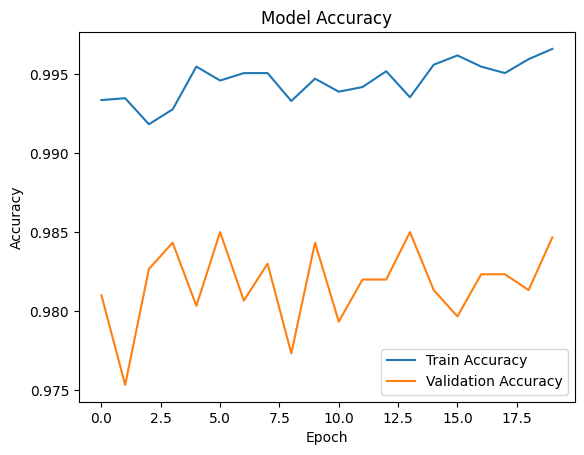

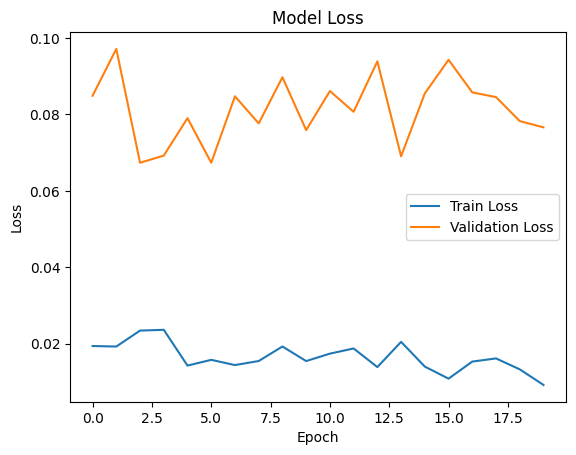

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
classifier.save('devanagari_digit_model.h5')